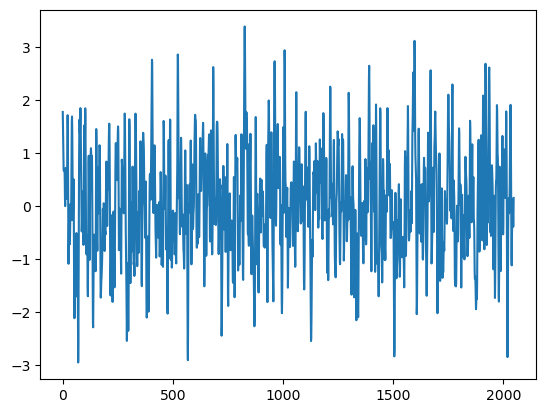

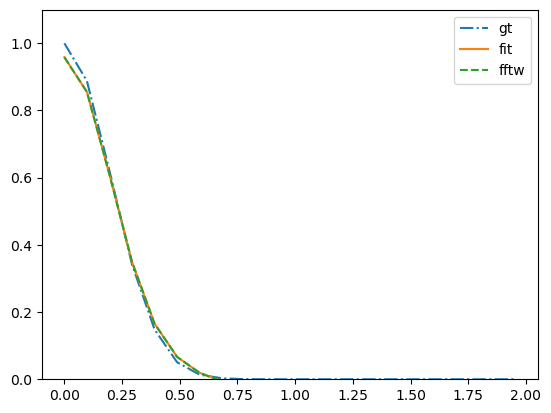

In [56]:
import numpy as np
import matplotlib.pyplot as plt

pref = "testing/est-acf/1D/"

ts = np.fromfile(pref + "acf-t.bin")

plt.plot(np.fromfile(pref + "ws-real-3000.bin"))
plt.show()

acf_gt = np.fromfile(pref + "acf-gt.bin")
acf_fftw = np.fromfile(pref + "acf-fftw.bin")
acf_fit = np.fromfile(pref + "acf-fit.bin")

acf_ts_filt = ts<2
acf_ts = ts[acf_ts_filt]

plt.plot(acf_ts, acf_gt[acf_ts_filt], "-.", label="gt")
plt.plot(acf_ts, acf_fftw[acf_ts_filt[:len(acf_fit)]], label="fit")
plt.plot(acf_ts, acf_fftw[acf_ts_filt[:len(acf_fftw)]], "--", label="fftw")
plt.ylim(0, 1.1)
plt.legend()
plt.show()

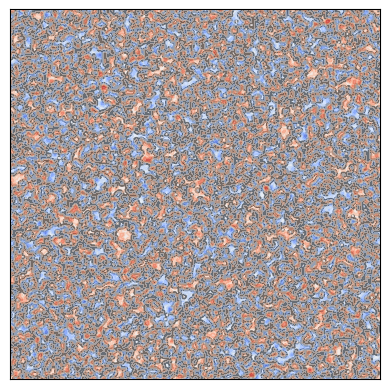

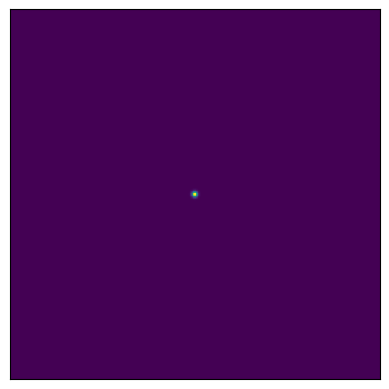

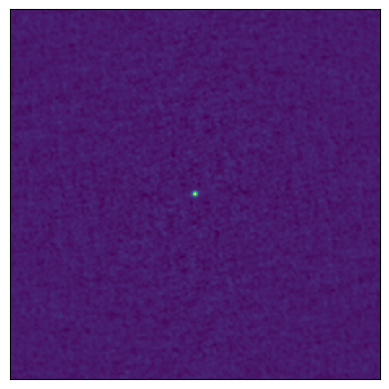

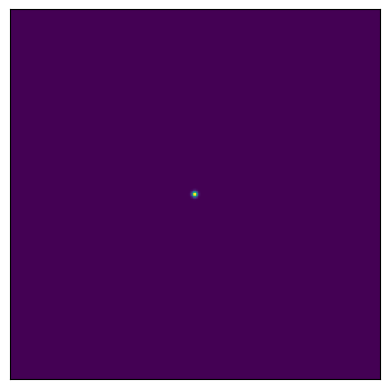

In [110]:
import utils
pref = "testing/est-acf/2D/"

utils.plot_prior(pref + "ws-real-3000.bin", plt.gca())

xs = np.linspace(-100,100,512)
xx, yy = np.meshgrid(xs,xs)

plt.show()

def plot_cov(file, ax, do_shift=False):
    realizations = np.fromfile(file, dtype=np.float64)
    res = int(np.sqrt(realizations.shape[0]))
    realizations = np.reshape(realizations, (res, res))
    realizations = realizations.transpose(1, 0)
    ax.pcolormesh(xx,yy, realizations)

    #ax.set_xlim(-5,5)
    #ax.set_ylim(-5,5)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])

plot_cov(pref + "acf-gt.bin", plt.gca())
plt.show()


plot_cov(pref + "acf-fftw.bin", plt.gca())
plt.show()


plot_cov(pref + "acf-fit.bin", plt.gca())
plt.show()

